In [38]:
import requests
from pypdf import PdfReader

In [39]:
url ="https://api.mistral.ai/v1/chat/completions"
api_key = "TK2i8fpEJr51WSjEMTtQIsyjB7GurjUW"
headers = {
    "Authorization": f"Bearer {api_key}",
    "Content-Type": "application/json"
}

In [40]:
def full_query(text , query):
    full_query = f"""
        ### Provided Text:
        {text}

        ### Queries to Answer:
        [{query}]
    """
    return full_query

In [41]:
def get_payload(pdf_text,query,extra_payload=None):
    prompt = """You are an AI assistant tasked with extracting accurate key insights from the provided text.  
    Strictly refer only to the given content and do not generate any information that is not explicitly stated in it.  
    ### Instructions:
    1. Base your responses solely on the provided text.
    2. If the information is not present, state: "The document does not contain this information."
    3. Do not make assumptions or infer details beyond the given content.
    4. Extract key insights concisely and accurately."""
    
    messages = [
        {"role": "system", "content": prompt},
        {"role": "user", "content": full_query(pdf_text,query)}
    ]
    payload = {
        **extra_payload,
        "model": "mistral-small-latest",
        "messages":messages
    }
    return payload

In [42]:
def extract_text_from_pdf(pdf_path):
    reader = PdfReader(pdf_path)
    text = "\n".join([page.extract_text() for page in reader.pages if page.extract_text()])
    return text

In [43]:
def get_response(url,pdf_text,query,extra_payload):
    try:
        response = requests.post(url, json=get_payload(pdf_text=pdf_text,query=query,extra_payload=extra_payload), headers=headers)
        
        response.raise_for_status()

        result = response.json()
        return response.json()["choices"][0]["message"]["content"]
    
    except requests.exceptions.HTTPError as http_err:
        return(f"HTTP error occurred: {http_err} - {response.text}")
    except requests.exceptions.ConnectionError:
        return("Error: Failed to connect to the API.")
    except requests.exceptions.Timeout:
        return("Error: The request timed out.")
    except requests.exceptions.RequestException as err:
        return(f"An unexpected error occurred: {err}")

<h1>Testing Mistral on Resume (No Tables)</h1>

In [123]:
pdf_path = "./pdfs/resume.pdf"
pdf_text = extract_text_from_pdf(pdf_path)

In [ ]:
extra_payload={        
    "max_tokens":4096,
    "temperature":0.6,
    "top_p":0.9,
}

In [122]:
query ="""Provide a 5 points summary of around 200 words in total for the above document provided to you."""
response = get_response(url=url,pdf_text=pdf_text,query=query,extra_payload=extra_payload)
print(response)

1. **Education and Academic Excellence**: Jay Jajoo is pursuing a Master's in Data Science at Northeastern University with a perfect CGPA of 4.0/4.0. He previously completed a B.Tech in Computer Science and Engineering from Vellore Institute of Technology with a CGPA of 9.05/10. His coursework includes advanced topics such as NLP, machine learning, and data management.

2. **Technical Proficiency**: Jay possesses a strong skill set in programming languages including Python, JavaScript, C++, and Java. He is proficient in frameworks like Flask, React, and Node.js, and has experience with libraries such as TensorFlow, PyTorch, and Scikit-learn. His toolkit also includes Git, AWS, and various development environments like VS Code and PyCharm.

3. **Professional Experience**: Jay has interned as a Data Science Intern at Imagine Web Technologies, where he conducted exploratory data analysis and engineered features for predictive modeling. He developed a Feedforward Neural Network in PyTorch,

<h1>Testing Mistral on Research Paper with 1 Table</h1>

<p style="color:red;"><strong>Results and Evaluation Matrices were different colums but it combined it into one column.</strong></p>
<p style="color:red;"><strong>This might be due to similar meanings of two columns.</strong></p>

<p style="color:green;"><strong>But fetched all data correctly.</strong></p>

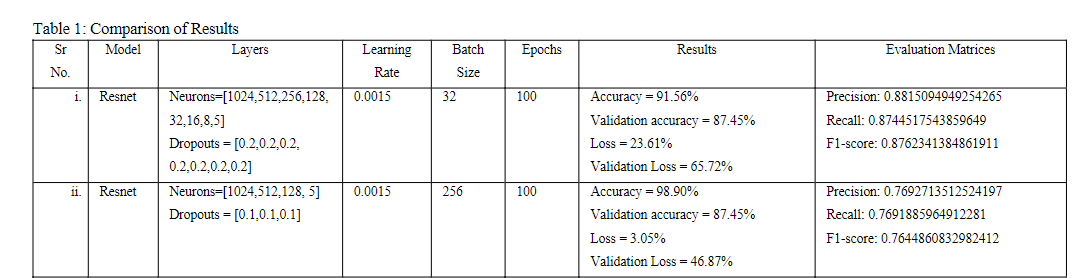

In [ ]:
extra_payload={        
    "max_tokens":4096,
    "temperature":0.7,
    "top_p":0.9,
}

In [124]:
pdf_path = "./pdfs/research paper 1.pdf"
pdf_text = extract_text_from_pdf(pdf_path)

In [83]:
query = """
Analyze the provided document and answer the following questions:

1. How many tables are present in the document?
2. Extract the contents of all tables while preserving their original structure, including column and row alignments.
3. Ensure the extracted tables are formatted in a way that, when printed using Python, they appear exactly as they are in the document. 
   - Each row and column must be separated by vertical and horizontal lines, maintaining correct spacing and alignment.
   - The output should be copy-paste ready for direct use in Python `print()` statements without any formatting loss.

Return the extracted tables exactly as they appear in the document.
"""
response = get_response(url=url,pdf_text=pdf_text,query=query,extra_payload=extra_payload)
print(response)

1. The document contains one table.

2. The extracted table is as follows:

```
+----+-----------------+------------------------------------------------------------+----------+--------+---------+-------------------------------------------------------------+
| Sr | Model           | Learning Rate | Batch Size | Epochs | Results Evaluation Matrices                             |
| No |                 |                |            |        |                                                             |
+----+-----------------+----------------+------------+--------+-------------------------------------------------------------+
| i. | Resnet          | Neurons=[1024,512,256,128,32,16,8,5] | 0.0015  | 32     | 100     | Accuracy = 91.56% Validation accuracy = 87.45% Loss = 23.61%  |
|    |                 | Dropouts = [0.2,0.2,0.2, 0.2,0.2,0.2,0.2] |        |        |        | Validation Loss = 65.72% Precision: 0.8815094949254265  |
|    |                 |                |            |    

<h1>Document with 2 Tables</h1>

<p style="color:green;"><strong>Extracted both the tables successfully.</strong></p>

In [125]:
pdf_path = "./pdfs/2 tables.pdf"
pdf_text = extract_text_from_pdf(pdf_path)

In [63]:
query = """
Analyze the provided document and answer the following questions:

1. How many tables are present in the document?
2. Extract the contents of all tables while preserving their original structure, including column and row alignments.
3. Ensure the extracted tables are formatted in a way that, when printed using Python, they appear exactly as they are in the document. 
   - Each row and column must be separated by vertical and horizontal lines, maintaining correct spacing and alignment.
   - The output should be copy-paste ready for direct use in Python `print()` statements without any formatting loss.

Return the extracted tables exactly as they appear in the document.
"""
response = get_response(url=url,pdf_text=pdf_text,query=query,extra_payload=extra_payload)
print(response)

### Answers:

1. **How many tables are present in the document?**
   - There are 2 tables present in the document.

2. **Extract the contents of all tables while preserving their original structure, including column and row alignments.**

   - **Table 1:**

    ```
    +-------------+-------------+-------------+
    |   Country    | GDP (Billion $) | Population (Million) | Growth Rate (%) |
    +-------------+-------------+-------------+
    |     USA      |      23,000     |        331         |       2.1       |
    |    China     |      17,700     |       1440         |       5.5       |
    |  Germany     |       4,200     |        83          |       1.2       |
    |    India     |       3,700     |       1400         |       6.8       |
    +-------------+-------------+-------------+
    ```

   - **Table 2:**

    ```
    +-------------+-------------+---------+---------+
    |  Product    |  Category   |  Price  |  Stock  | Rating  |
    +-------------+-------------+---------+-

<h1>4 complex Tables (multiple sub-rows for each main row)</h1>

<p style="color:green;"><strong>Extracted all the tables successfully even if there's some mis-alignments in the original tables.</strong></p>

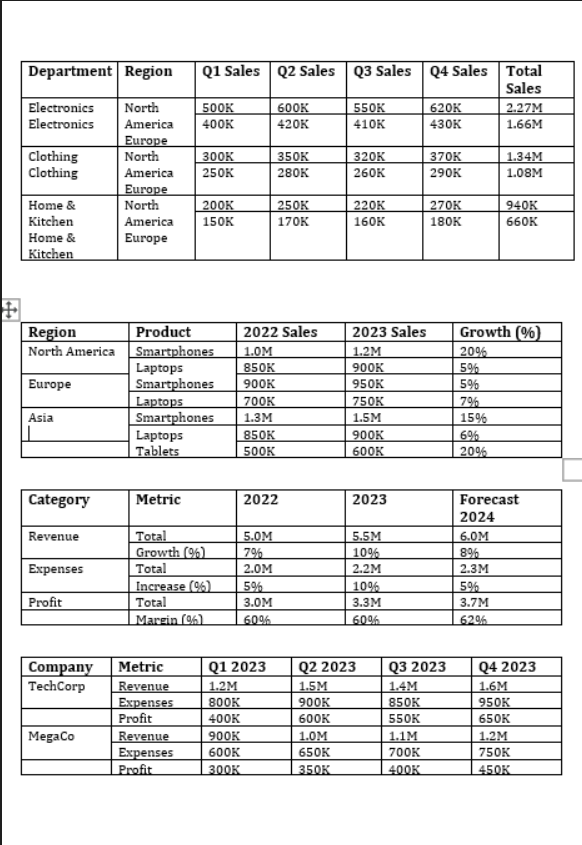

In [126]:
pdf_path = "./pdfs/3 complex tables.pdf"
pdf_text = extract_text_from_pdf(pdf_path)

In [65]:
query = """
Analyze the provided document and answer the following questions:

1. How many tables are present in the document?
2. Extract the contents of all tables while preserving their original structure, including column and row alignments.
3. Ensure the extracted tables are formatted in a way that, when printed using Python, they appear exactly as they are in the document. 
   - Each row and column must be separated by vertical and horizontal lines, maintaining correct spacing and alignment.
   - The output should be copy-paste ready for direct use in Python `print()` statements without any formatting loss.

Return the extracted tables exactly as they appear in the document.
"""
response = get_response(url=url,pdf_text=pdf_text,query=query,extra_payload=extra_payload)
print(response)

1. There are 4 tables present in the document.

2. The contents of all tables, preserving their original structure, are as follows:

### Table 1
```
| Department | Region     | Q1 Sales | Q2 Sales | Q3 Sales | Q4 Sales | Total Sales |
|------------|-------------|----------|----------|----------|----------|-------------|
| Electronics | North America | 500K     | 600K     | 550K     | 620K     | 2.27M       |
| Electronics | Europe       | 400K     | 420K     | 410K     | 430K     | 1.66M       |
| Clothing    | North America | 300K     | 350K     | 320K     | 370K     | 1.34M       |
| Clothing    | Europe       | 250K     | 280K     | 260K     | 290K     | 1.08M       |
| Home & Kitchen | North America | 200K     | 250K     | 220K     | 270K     | 940K        |
| Home & Kitchen | Europe       | 150K     | 170K     | 160K     | 180K     | 660K        |
```

### Table 2
```
| Region       | Product       | 2022 Sales | 2023 Sales | Growth (%) |
|--------------|---------------|----------

In [68]:
query = """
Analyze the provided document and answer the following questions:

1. How many tables are present in the document?
2. Do mathematical anlysis for each table and provide me with some interetsing insights from the data. 

"""
response = get_response(url=url,pdf_text=pdf_text,query=query,extra_payload=extra_payload)
print(response)

### Answers:

1. **How many tables are present in the document?**
   - There are 4 tables present in the document.

2. **Mathematical Analysis and Insights:**

   **Table 1: Sales Data by Region and Product**

   | Department | Region   | Q1 Sales | Q2 Sales | Q3 Sales | Q4 Sales | Total Sales |
   |------------|-----------|----------|----------|----------|----------|------------|
   | Electronics| North America | 500K    | 600K    | 550K    | 620K    | 2.27M     |
   | Electronics| Europe       | 400K    | 420K    | 410K    | 430K    | 1.66M     |
   | Clothing   | North America | 300K    | 350K    | 320K    | 370K    | 1.34M     |
   | Clothing   | Europe       | 250K    | 280K    | 260K    | 290K    | 1.08M     |
   | Home & Kitchen | North America | 200K    | 250K    | 220K    | 270K    | 940K      |
   | Home & Kitchen | Europe       | 150K    | 170K    | 160K    | 180K    | 660K      |

   - **Insights:**
     - **Electronics** has the highest total sales in both North America an

<h1>Table (multiple sub-cols for each main cols)</h1>

<p style="color:green;"><strong>Recognized the sub columns splits correctly.</strong></p>

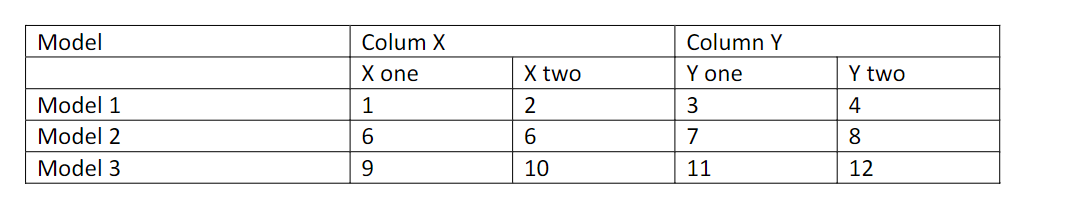

In [127]:
pdf_path = "./pdfs/only_sub_cols_split.pdf"
pdf_text = extract_text_from_pdf(pdf_path)

In [111]:
extra_payload={        
    "max_tokens":4096,
    "temperature":0.6,
    "top_p":0.9,
}

query = """
Analyze the provided document and answer the following questions:

1. How many tables are present in the document?
2. Extract the contents of all tables while preserving their original structure, including column and row alignments.
3. Ensure the extracted tables are formatted in a way that, when printed using Python, they appear exactly as they are in the document. 
   - Each row and column must be separated by vertical and horizontal lines, maintaining correct spacing and alignment.
   - The output should be copy-paste ready for direct use in Python `print()` statements without any formatting loss.

Return the extracted tables exactly as they appear in the document.
"""
response = get_response(url=url,pdf_text=pdf_text,query=query,extra_payload=extra_payload)
print(response)

1. There is 1 table present in the document.

2. The contents of the table are as follows:

```
+---------+-------+-------+-------+-------+
| Model   |   X   |   X   |   Y   |   Y   |
|         | one   | two   | one   | two   |
+---------+-------+-------+-------+-------+
| Model 1 |   1   |   2   |   3   |   4   |
| Model 2 |   6   |   6   |   7   |   8   |
| Model 3 |   9   |  10   |  11   |  12   |
+---------+-------+-------+-------+-------+
```

The document does not contain any additional tables.


<h1>1 very complex Table (multiple sub-rows and sub-cols for each main row and cols)</h1>

<p style="color:red;"><strong>Not able to detect the column splits.</strong></p>

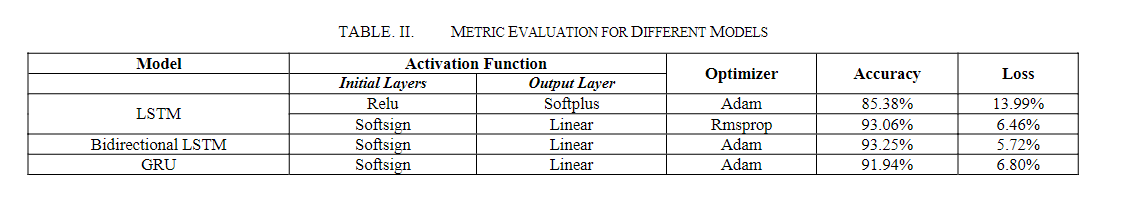

In [128]:
pdf_path = "./pdfs/research_paper 2.pdf"
pdf_text = extract_text_from_pdf(pdf_path)

In [106]:
extra_payload={        
    "max_tokens":4096,
    "temperature":0.7,
    "top_p":0.9,
}

query = """
Analyze the provided document and extract detailed information from all tables while maintaining their original structure.
"""
response = get_response(url=url,pdf_text=pdf_text,query=query,extra_payload=extra_payload)
print(response)

### Table II: Metric Evaluation for Different Models

| Model               | Activation Function | Optimizer | Accuracy | Loss   | Initial Layers | Output Layer |
|---------------------|---------------------|-----------|----------|--------|----------------|-------------|
| LSTM                | Relu                | Softplus  | Adam     | 85.38%  | 13.99%          |              |
|                     | Softsign            | Linear    | Rmsprop  | 93.06%  | 6.46%           |             |
| Bidirectional LSTM  | Softsign            | Linear    | Adam     | 93.25%  | 5.72%           |             |
| GRU                 | Softsign            | Linear    | Adam     | 91.94%  | 6.80%           |             |
